In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/interested_data_NDAP_REPORT_7067.csv')

# **NULL VALUES**

In [ ]:
for columns in df.columns:
  print(str(columns) + "------>" + str(df[columns].isnull().sum()))

Rowid------>0
Country------>0
State lgd code------>0
State------>0
District lgd code------>0
District------>0
Yearcode------>0
Year------>0
Registrations for  ante natal care ( anc ) in the first trimester (to total anc registrations) (%)------>90
Janani suraksha yojana ( jsy ) registrations( to total anc registrations) (%)------>90
Home deliveries------>109
Home deliveries attended by doctor or nurse or auxiliary nurse midwife ( anm )s trained as sba------>140
Home deliveries attended by traditional birth attendants ( tba ) or dai non-trained as skill birth attendants ( sba )------>115
Home deliveries attended by skilled birth attendants ( sba ) (to total reported home deliveries) (%)------>169
Janani suraksha yojana ( jsy ) incentives paid for home deliveries------>285
 janani suraksha yojana ( jsy ) incentives paid for home deliveries (to total reported home deliveries) (%)------>169
Deliveries conducted at public institutions------>88
Institutional deliveries------>88
Institutional

# **DUPLICATES**

In [ ]:
duplicate = df[df.duplicated()]

In [ ]:
duplicate

,Rowid,Country,State lgd code,State,District lgd code,District,Yearcode,Year,Registrations for ante natal care ( anc ) in the first trimester (to total anc registrations) (%),Janani suraksha yojana ( jsy ) registrations( to total anc registrations) (%),...,"Patients given ayurveda, yoga and naturopathy, unani, siddha, and homoeopathy ( ayush ) treatment in out-patient department (to patients in out-patient department) (%)",Patients received dental procedure in out-patient department,Patients in out-patient department with dental procedure (to patients in out-patient department) (%),Adolescents counselled,Cases having hb less than 7gm/dl (to number of haemoglobin (hb) tests conducted) (%),Male hiv positive cases (to number of hiv tests conducted on males) (%),Female hiv positive cases (to number of hiv tests conducted on females) (%),Total hiv positive cases (to the number of hiv tests conducted ) (%),Blood smears tested positive for plasmodium vivax (to total blood smears examined for malaria) (%),Blood smears tested positive for plasmodium falciparum (to total blood smears examined for malaria) (%)


In [ ]:
len(duplicate)

0

In [ ]:
# DataFrame.drop_duplicates(subset=None, *, keep='first', inplace=False, ignore_index=False)[source]
# To remove duplicate rows

# **PLOTTING DATA for Jammu and Kashmir**

In [ ]:
# for column in df.columns:
#     print(f"{column} ------> {df[column].dtype}")

In [ ]:
df_jammu = df[df["State"]=="Jammu And Kashmir"]

In [ ]:
df_jammu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 119
Columns: 129 entries, Rowid to Blood smears tested positive for plasmodium falciparum (to total blood smears examined for malaria) (%)
dtypes: float64(121), int64(4), object(4)
memory usage: 121.9+ KB


In [ ]:
group_by = 'District'
list_year = list(df_jammu[group_by].unique())
print(list_year)

['Anantnag', 'Budgam', 'Baramulla', 'Doda', 'Jammu', 'Kathua', 'Kupwara', 'Poonch', 'Pulwama', 'Rajouri', 'Srinagar', 'Udhampur', 'Kishtwar', 'Ramban', 'Kulgam', 'Bandipora', 'Samba', 'Shopian', 'Ganderbal', 'Reasi']


In [ ]:
column_to_plot = "Abortions reported"
list_column_sum = list(df_jammu.groupby(group_by)[column_to_plot].sum())
print(list_column_sum)

[12144.0, 1288.0, 6913.0, 2445.0, 781.0, 908.0, 12961.0, 4606.0, 1375.0, 1130.0, 4609.0, 2357.0, 3967.0, 2632.0, 1462.0, 1091.0, 1337.0, 960.0, 6354.0, 2570.0]


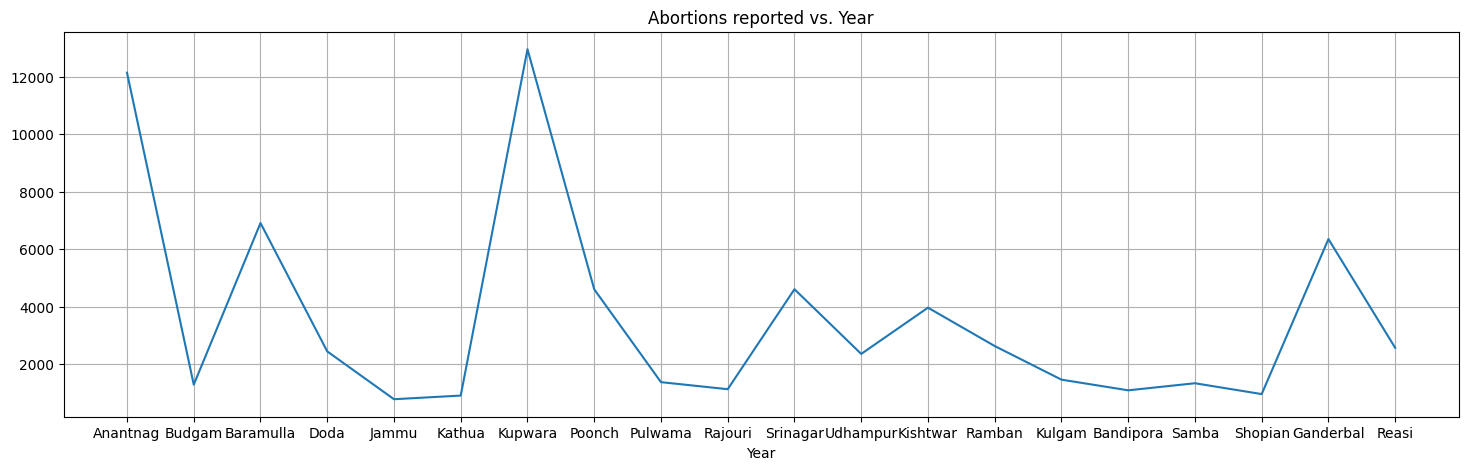

In [ ]:
plt.figure(figsize=(18, 5))
plt.plot(list_year, list_column_sum)
plt.xlabel("Year")
plt.grid(True)
plt.title(f"{column_to_plot} vs. Year")
plt.show()